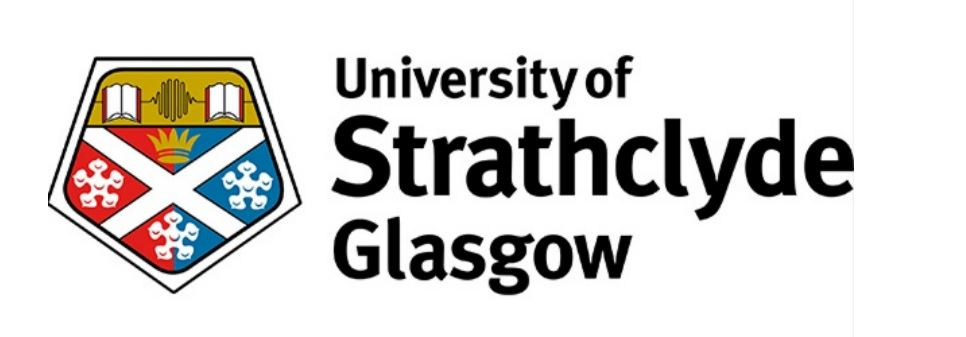

# ***CS985 Spotify Classification Problem 2024***

**TEAM NAME:CS985 Group 11**
1.   Deepali Yadav
2.   Fatemah Ashkanani
3.   Linu Roby
4.   Ohud Alghamdi
5.   Teerachaya Lhaeman

# **Goal - Prediction of top genre of song**
This notebook aims to classify songs based on their genre from a Spotify past decades songs datasets. The first dataset is the train dataset where the prediction model will be trained on. The other dataset is the test dataset that is given later on for the model to produce the prediction file. Building a song genre classification model not only the music industry but also listeners by personalizing recommendations and also easily searching for songs from their desired genres. The notebook will explore the dataset by analysing, cleaning, and preparing the data for Machine Learning application. Therefore, the goal of this notebook is to make an analysis for the dataset taking the genres into considerations.
##### Hence, what factors are affecting the genre?


### **Install/Import of required libraries**

In [1]:
# import useful libraries for analyzing, cleaning, ploting data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import scipy.stats as stats
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import ttest_1samp
import sklearn
from sklearn import datasets
from sklearn import metrics
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## **Model description and Solution**
The final model which was used in this machine learning was Random Forest Classifier model. The provided dataset was noisy and contained features like artist, danceability, loudness, energy, etc.Through data preprocessing and visualisation, the features affecting the predcition fo top genre classification were identified and processed by mutating unwanted features, handling null  and categorical values.

The data was split to training and testing to feed to the algorithm for learning. Random Forest is a powerful and popular ensemble method. This has given higher performance than the individual Decision tree classifier and other models tested. Random forest works on multiple deicision trees. Each tree gets trained on different subset of training data. Their predictions are then combined to get the final prediction.
This model is recommended for this classification problem as this model is resistant to outliers and noise in data where we have many variations in the audio features.

Finally the models were evaluated to see how well they performed on unseen data by calculating their accuracy. At the end, the selected model was fed with the test data and the predictions were obtained.

## **Import data from the given sets to panda dataframe**.


In [2]:
dtest = pd.read_csv("CS98XClassificationTest.csv") #in the same folder as the python .ipynb file
dtrain = pd.read_csv("CS98XClassificationTrain.csv") #in the same folder as the python .ipynb file

#### Saving the Id column from the test dataset in one variable to use later on for the predition.

In [3]:
dtest2=dtest['Id']

## Exploratory Data Analysis (EDA)
Id column is just an identifier column for the records in the dataset. This clearly doesnot influence in the prediction of popularity score. In the same way, title is for each song and by intuition, I have dropped this column too. The column 'artist' may have some influence in the prediction but this is a categorical column with many values. Including this for data analysis will be computationally challenging and hence this is dropped too after analysing its effect on the top genre.
Further pre processing is done to anaylse and visualise the data to understand its structure, patterns, distributions, and relationships between variables.

In [4]:
dtrain.head(2)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN


In [5]:
num_rows, num_features = dtrain.shape
dtrain.shape

(453, 15)

In [6]:
# Display the range of years covered
min_year = dtrain['year'].min()
max_year = dtrain['year'].max()
print(f"The songs cover the years from {min_year} to {max_year}.")

The songs cover the years from 1948 to 2019.


###### This collection of data includes information about songs, such as title, artist, year of release and song properties. It consists of 453 rows and 15 features covering songs from the year 1948 untill 2019.

Lets view a statistical summary of the dataset. This provides count, mean, standard deviation, etc for each columns.

In [7]:
# View the statistical values
dtrain.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


View more information about the column entities and see the columns which are numerical and categorical based on their datatypes.

In [8]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [9]:
dtrain.isna().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

###### The dataset has 3 categorical features and 12 numerical features. Top genre feature has 15 missing values.
Having null values in the data can affect prediction and performance of the model. To handle this, rows with null values could be removed(imputation). But since the provided data is already small scale, removing further rows will further reduce the amount of data from which the model can learn. Here we have decided to retain these rows and fill with random values sampling.

In [10]:
# There are 15 rows with null values in topgenre. Replace these with random sampling
topgenre_values = dtrain['top genre'].dropna().unique()
dtrain['top genre'].fillna(np.random.choice(topgenre_values), inplace=True)
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  453 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


##### Check what years do the songs in the dataframe span?

In [11]:
years= dtrain['year'].astype(int).unique()
years.sort()
years

array([1948, 1953, 1957, 1958, 1959, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

##### Create a word cloud for the top genre feature to better visualize the data. The size of the word in a word cloud indicates that it appeared more frequently.

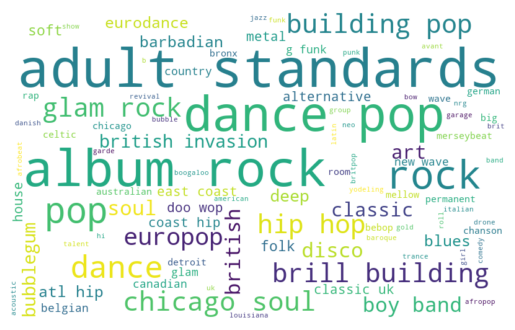

In [12]:
# Join all the text into a single string
string = ' '.join(dtrain['top genre'])

# Create a WordCloud
tgwordcloud = WordCloud(width=800, height=500, background_color='white').generate(string)

# Display the word cloud
plt.imshow(tgwordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### The output of the wordcloud shown above, lists the top genres. The genres that are repeated the most in the dataset are adult standards, album rock, dance pop, and rock.

##### Check the number of unique values the top genre feature has

In [13]:
genres= dtrain['top genre'].astype(str).unique()
genres_count = dtrain['top genre'].nunique()
print("The number of different genres the Top genre feature has:", genres_count)

The number of different genres the Top genre feature has: 86


In [14]:
genres

array(['adult standards', 'chicago soul', 'glam rock', 'pop',
       'album rock', 'boy band', 'brill building pop', 'rock-and-roll',
       'country rock', 'canadian pop', 'dance pop', 'europop', 'bebop',
       'art rock', 'disco', 'blues', 'barbadian pop',
       'deep adult standards', 'deep house', 'atl hip hop', 'dance rock',
       'disco house', 'bubblegum dance', 'classic soul', 'classic uk pop',
       'east coast hip hop', 'doo-wop', 'britpop', 'british blues',
       'soft rock', 'australian talent show', 'art pop', 'british soul',
       'british invasion', 'belgian pop', 'big room', 'german dance',
       'italian pop', 'british folk', 'brit funk', 'neo mellow',
       'british comedy', 'hip hop', 'new wave pop', 'eurodance',
       'detroit hip hop', 'classic rock', 'uk garage', 'afrobeat', 'r&b',
       'chicago rap', 'classic danish pop', 'british dance band',
       'drone folk', 'permanent wave', 'merseybeat', 'g funk',
       'blues rock', 'celtic rock', 'bow pop', 

## Visualisations
Further visualisation is done for other features which made it easier to understand the features and its importance for classification.

### Understanding the relationship between numerical features in the dataset


In [15]:
# Create a correlation matrix
matrix= dtrain.drop(columns=['title','artist','top genre'])

In [16]:
corr_metrics = matrix.corr()
corr_metrics.style.background_gradient()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Id,1.000000,-0.027718,0.055114,0.043105,0.043052,-0.025988,-0.035120,0.042832,0.061114,-0.071105,0.084924,0.086837
year,-0.027718,1.000000,-0.039243,0.122396,0.224497,0.291471,-0.000011,-0.025627,-0.045699,-0.127588,0.186732,-0.054293
bpm,0.055114,-0.039243,1.000000,0.227551,-0.009167,0.103372,0.017632,0.152745,0.025603,-0.222571,0.051271,0.055024
nrgy,0.043105,0.122396,0.227551,1.000000,0.348121,0.683883,0.096633,0.422263,0.179608,-0.662268,0.205850,0.303797
dnce,0.043052,0.224497,-0.009167,0.348121,1.000000,0.254994,-0.084432,0.475557,0.115310,-0.396887,0.240809,0.258670
dB,-0.025988,0.291471,0.103372,0.683883,0.254994,1.000000,0.081476,0.158665,0.100780,-0.457386,0.229775,0.316854
live,-0.035120,-0.000011,0.017632,0.096633,-0.084432,0.081476,1.000000,0.070931,-0.105701,-0.023418,0.088667,-0.051364
val,0.042832,-0.025627,0.152745,0.422263,0.475557,0.158665,0.070931,1.000000,-0.146161,-0.254956,0.084586,-0.018713
dur,0.061114,-0.045699,0.025603,0.179608,0.115310,0.100780,-0.105701,-0.146161,1.000000,-0.284181,0.098079,0.363266
acous,-0.071105,-0.127588,-0.222571,-0.662268,-0.396887,-0.457386,-0.023418,-0.254956,-0.284181,1.000000,-0.208819,-0.465875


### Understanding the relationship between top genre and the rest of the features in the dataset
The top genre feature has 86 genres as calculated above which makes it challenging to visualise in plots. In order to know the relationship between the top genre feature and all of the numerical features at once, pivot method is used. The pivot table function is used to group the dataset by a specified categorical feature 'top genre', and then calculates the mean of each numerical feature for each group. The resulting table has the top genre as the rows and the mean values of the numerical features as the columns. Calculating the mean of the numerical features for each genre in top genre feature can help identify patterns and trends in the data.

In [19]:
# Pivot the DataFrame to have the categorical feature as columns
pivot_dtrain = dtrain.pivot_table(values=['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop'], index='top genre', aggfunc='mean')

## Print the pivoted DataFrame as a table
print(pivot_dtrain)

                     acous         bpm         dB       dnce         dur  \
top genre                                                                  
acoustic blues   20.000000  174.000000 -11.000000  54.000000  290.000000   
adult standards  56.647059  110.441176 -10.838235  49.750000  182.794118   
afrobeat         27.000000  114.000000 -12.000000  68.000000  160.000000   
afropop          45.000000  119.000000 -17.000000  34.000000  411.000000   
album rock       21.424242  123.575758  -9.045455  56.727273  249.787879   
...                    ...         ...        ...        ...         ...   
r&b              17.000000  118.000000  -3.000000  73.000000  285.000000   
rock-and-roll    36.000000   64.000000  -6.000000  52.000000  144.000000   
soft rock        46.000000  133.400000  -9.400000  58.000000  212.800000   
uk garage         9.000000  127.000000 -11.000000  84.000000  238.000000   
yodeling         77.000000  102.000000 -17.000000  69.000000  148.000000   

           

Based on the above output, it is shown that spch, live, and dB have much lower mean values comparing with the other numerical features with high mean values.

### **Data Encoding**
As title is specific for each song and wont be affecting the classification, thsi column will be dropped. There is still one categorical column 'artist' which we are converting to numerical column using a Label Encoder. The original column is replaced with the single encoded column.

In [22]:
# Encode the categorical features in the dataset
le = LabelEncoder()
dtrain['artist'] = le.fit_transform(dtrain['artist'])
dtest['artist'] = le.fit_transform(dtest['artist'])

In [23]:
dtrain= dtrain.drop(columns=['title','year','Id','pop'])
dtest= dtest.drop(columns=['title','year','Id','pop'])

## **Model Training**
### This section will include several machine learning models applied on the dataset. Then the accuracy rate of each model is calculated in order to choose the best model to use for prediction on the test dataset.  

#### 1. K-Nearest Neighbors (KNN):

KNN can be used for classification by predicting the category. It uses n_neighbors parameter which refers to the number of nearest neighbors to assest making prediction and classifies the data point based on the majority of the class. The number of neighbors is taken as 5. The accuracy retrieved was however very low.


In [24]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dtrain.drop(columns=['top genre']), dtrain['top genre'], test_size=0.2, random_state = 111)

# Creating a KNN classifier with 5 neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
# Fitting the model to the training data
model2.fit(X_train, y_train)
# Making predictions on the test data
predictions = model2.predict(X_test)
# Printing the accuracy of the predictions
acc = accuracy_score(y_test, predictions)
print("The accuracy of the KNN model is:", acc)

The accuracy of the KNN model is: 0.14285714285714285


#### 2. Decision Tree Classifier:

A Decision Tree Classifier works as a categorical classifier. Based on the features of the dataset, it passes questions and uses the answers for predicting the category. This would be a better fit for the classification as this is highly interpretable. Since they are less sensitive to outliers, the performance will not be impacted by the outliers in our data.

In [25]:
# Create a decision tree classifier
model = DecisionTreeClassifier()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
predictions = model.predict(X_test)
# Print the accuracy of the predictions
acc = accuracy_score(y_test, predictions)
print("The Accuracy of the Decision Tree model is:", acc)

The Accuracy of the Decision Tree model is: 0.16483516483516483


#### 3. Support Vector Classifier (SVC):

SVC is designed to get the best decision boundary to split different classes of data points with the widest margin. As our data is having non-linear relationship, the SVC model was used with poly kernels for transforming the data to a higer dimension. As our dataset is small, there may be the problem of overfitting. SVC models can better handle this. This model gave a better accuracy than the previous models.

In [26]:
# Create a SV classifier with a polynomial kernel
model3 = SVC(kernel='poly')
# Fit the model to the training data
model3.fit(X_train, y_train)
# Make predictions on the test data
predictions3 = model3.predict(X_test)
# Print the accuracy of the predictions
acc = accuracy_score(y_test, predictions3)
print("The accuracy of the SVC model is:", acc)

The accuracy of the SVC model is: 0.25274725274725274


#### 4. AdaBoost Classifier
It's Adaptive Boosting, it uses Ensemble learning and it works by combining multiple weak learners to create a strong. This is a versatile classifier and is expected to give higher performance in classification tasks.

In [27]:
# Create an AdaBoost Classifier
model_ada = AdaBoostClassifier()
# Fit the model to the training data
model_ada.fit(X_train, y_train)
# Make predictions on the test data
predictions_ada = model_ada.predict(X_test)
# Print the accuracy of the predictions
acc_ada = accuracy_score(y_test, predictions_ada)
print("The accuracy of the AdaBoost Classifier model is:", acc_ada)


The accuracy of the AdaBoost Classifier model is: 0.17582417582417584


### One hot encoding - artist
One hot encoding removes ordinal Relationships as opposed to what was done for Label encoding. Unlike numerical encoding (assigning each artist a unique number), one-hot encoding does not imply any order among artists. We will switch to one hot encoding to prevent if any bias included from Label. For each unique genre, a new column is created and is represented by presence or absence of that category.

In [28]:
dtest_one_hot_encoded = pd.read_csv("CS98XClassificationTest.csv") #in the same folder as the python .ipynb file
dtrain = pd.read_csv("CS98XClassificationTrain.csv") #in the same folder as the python .ipynb file

Year may be relevant is classifying the genre. So we are including this feature back and dropping the feature duration(dur).

In [29]:
dtrain = dtrain.dropna(subset=['top genre'])
dtrain= dtrain.drop(columns=['title','dur','Id','pop'])
dtest_one_hot_encoded= dtest_one_hot_encoded.drop(columns=['title','dur','Id','pop'])

In [30]:
# hot encode 'artist'
encoder = OneHotEncoder(handle_unknown='ignore')
# Fit the encoder on the training data
encoder.fit(dtrain[['artist']])
# Transform both training and testing data
train_encoded = encoder.transform(dtrain[['artist']])
test_encoded = encoder.transform(dtest_one_hot_encoded[['artist']])

In [31]:
dtrain = pd.get_dummies(dtrain, columns=['artist'])
dtest_one_hot_encoded = pd.get_dummies(dtest_one_hot_encoded, columns=['artist'])

# Align the test set columns to the train set
test_aligned, train_aligned = dtest_one_hot_encoded.align(dtrain, join='right', axis=1, fill_value=0)

In [32]:
train_aligned.head(5)

,year,bpm,nrgy,dnce,dB,live,val,acous,spch,top genre,...,artist_Wamdue Project,artist_Wayne Fontana & The Mindbenders,artist_Wham!,artist_White Lion,artist_Whitesnake,artist_Whitney Houston,artist_Yazoo,artist_Youngbloodz,artist_Yusuf / Cat Stevens,artist_ZZ Top
0,1996,107,31,45,-8,13,28,75,3,adult standards,...,False,False,False,False,False,False,False,False,False,False
2,1979,105,36,63,-9,13,67,11,3,adult standards,...,False,False,False,False,False,False,False,False,False,False
3,1980,170,28,47,-16,13,33,25,3,adult standards,...,False,False,False,False,False,False,False,False,False,False
4,1973,121,47,56,-8,15,40,45,3,glam rock,...,False,False,False,False,False,False,False,False,False,False
5,2010,110,56,71,-7,12,23,15,6,pop,...,False,False,False,False,False,False,False,False,False,False


#### 5. Random Forest Classifier
As we have already tried decision tree classifier, the ensemble of decision tree would give a better prediction as it will be trained on different subsets of data. With one hot encoding, the bias introduced earlier due to Label encoding might be eliminated and we expect a better performance.

In [33]:
# Do the standard train test split for model training
X_train, X_test, y_train, y_test = train_test_split(train_aligned.drop(columns=['top genre']), train_aligned['top genre'], test_size=0.2, random_state=111)

In [34]:
model_rf2 = RandomForestClassifier(n_estimators=75, random_state=39)
model_rf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=75, random_state=39)

In [35]:
predictions_rf2 = model_rf2.predict(X_test)

acc_rf2 = accuracy_score(y_test, predictions_rf2)
print("The accuracy of the RandomForest Classifier model is:", acc_rf2)

The accuracy of the RandomForest Classifier model is: 0.36363636363636365


### Evaluating models/Model selection

Various models were trained on the training dataset and the accuracies were observed. By comparing between these accuracies, it is noticed that the Random Forest Classifier has the higher accuracy rate. Therefore, it will be applied on the test dataset to make the genre predictions.  

## Test set Prediction


In [36]:
prediction_rf = model_rf2.predict(test_aligned.drop(columns=['top genre']))

##### Save and printing the predictions as a dataframe by joining the earlier saved Id feature and the preditions feauture.

In [37]:
# Create a Pandas DataFrame from the prediction results
rf = pd.DataFrame({'Id': dtest2 , 'top genre': prediction_rf})
rf.to_csv("classification_randomforest.csv", index=False)

In [39]:
print(rf)

      Id           top genre
0    454           dance pop
1    455           glam rock
2    456           glam rock
3    457           dance pop
4    458     adult standards
..   ...                 ...
108  563           dance pop
109  564           dance pop
110  565  east coast hip hop
111  566          album rock
112  567          glam metal

[113 rows x 2 columns]


In [40]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, predictions_rf2)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'y_test' contains the true labels and 'predictions3' contains the predicted labels
precision = precision_score(y_test, predictions_rf2, average='weighted')
recall = recall_score(y_test, predictions_rf2, average='weighted')
f1 = f1_score(y_test, predictions_rf2, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.23194805194805193
Recall: 0.36363636363636365
F1-score: 0.2612665382056342


C:\Users\ftaqi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


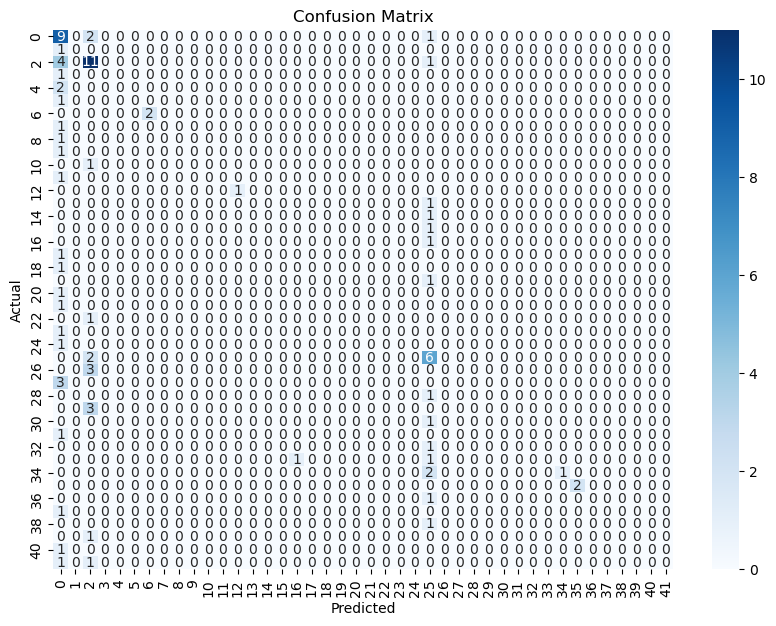

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Distribution of predicted genres

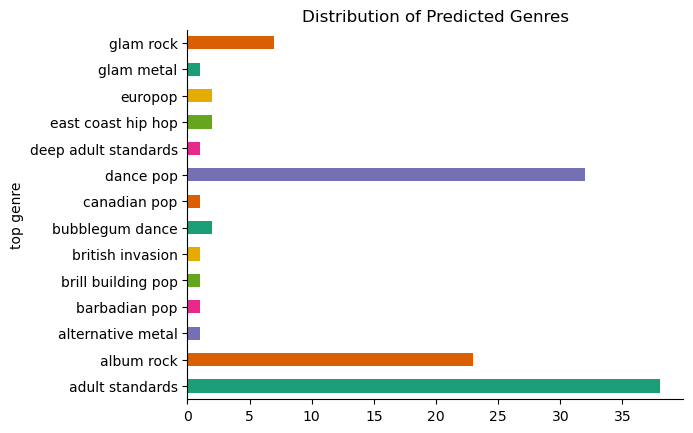

In [38]:
plt.title('Distribution of Predicted Genres')
rf.groupby('top genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## **Performance in Kaggle**
The files were downloaded and submitted to kaggle. The best score was captured as below.

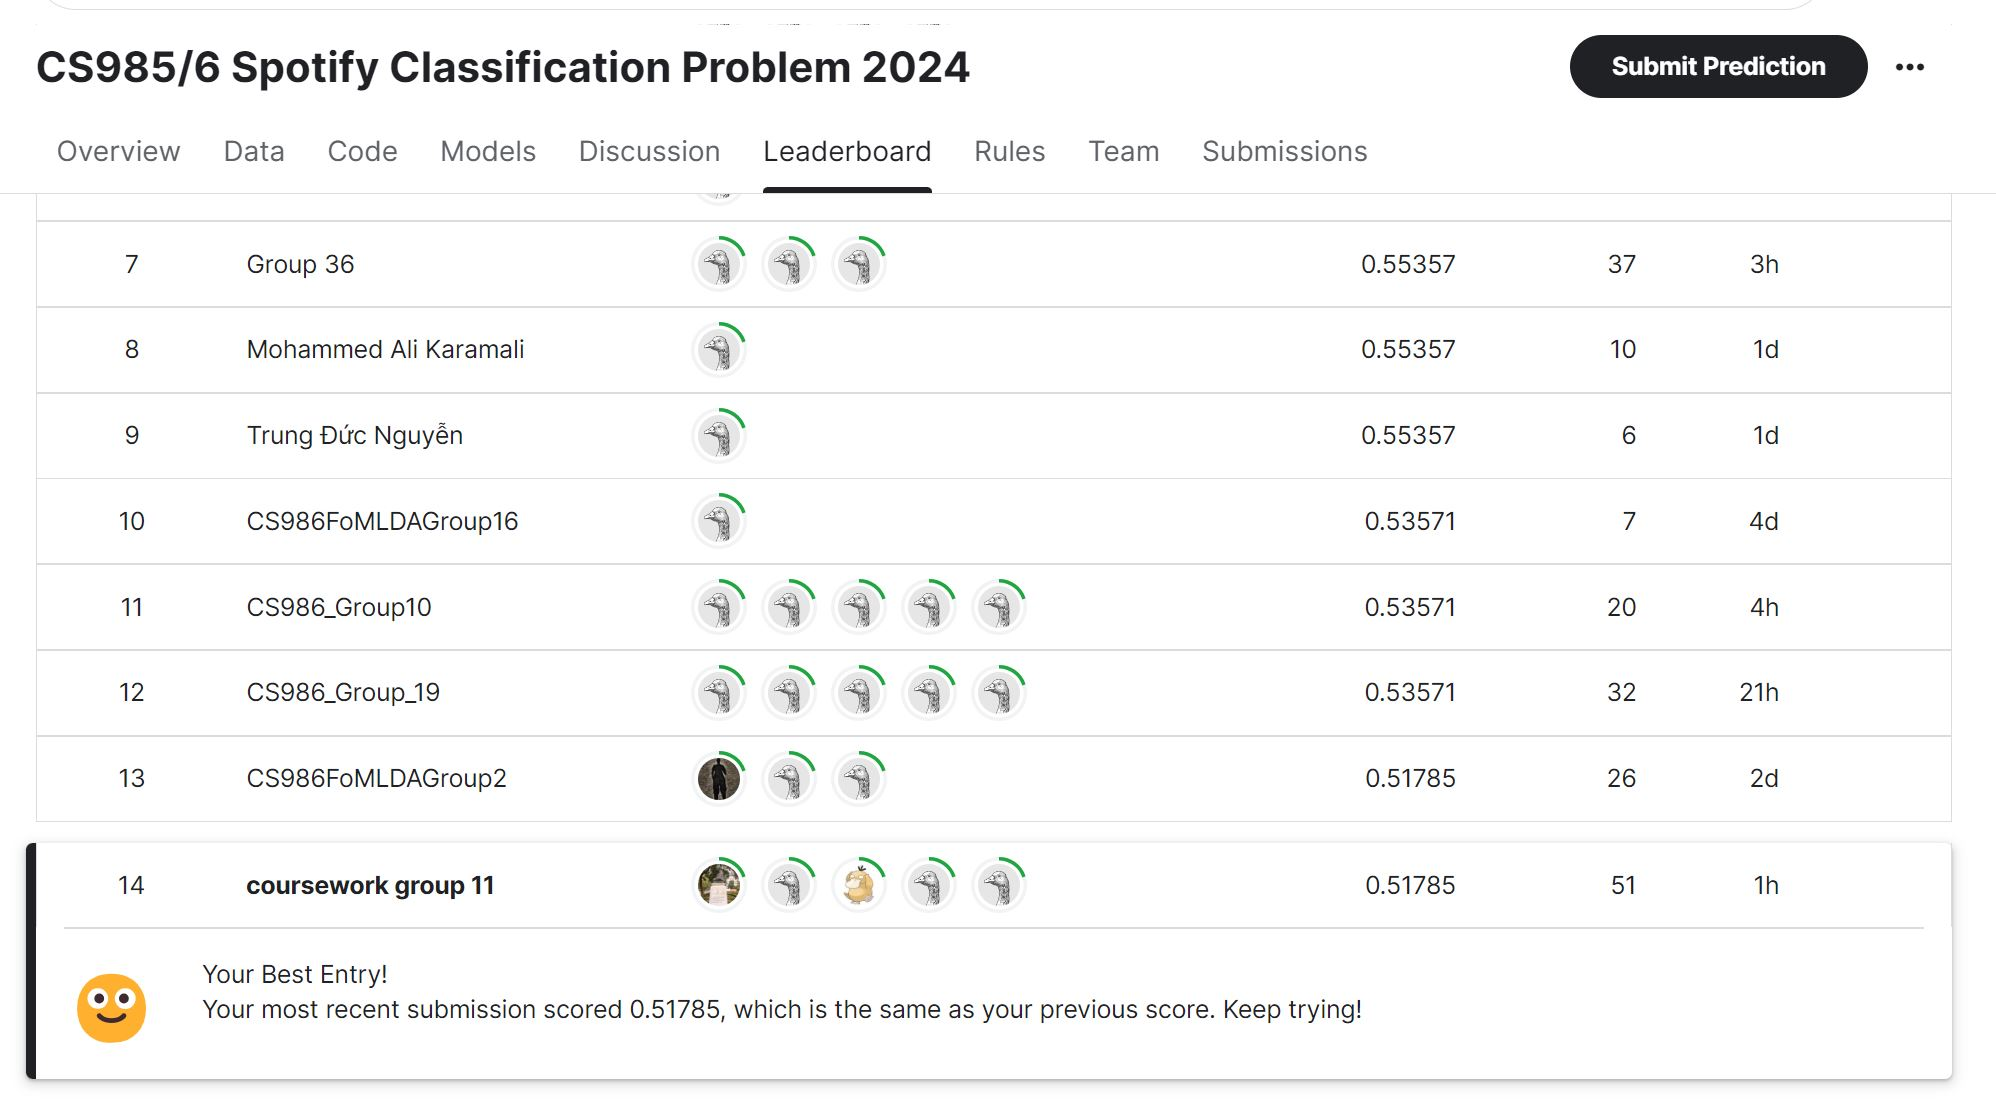

# **Conclusion**

In this notebook, a spotify training dataset was explored. The notebook produced prediction of genres on a test dataset after trying to train different machine learning models on the training dataset. It was concluded that the Random forest performed better than the other models and got a better prediction performance score in Kaggle. The ensemble of Decision trees might have contributed to this effectiveness. Understanding the nature of the data can help us to build a better model which requires a domain knowledge in music area, for the features to be selected and generated. A notable challenge during the analysis was dealing with a multi-class categorical feature in the dataset and trying to plot them. Moreover, one more challenging encounter is finding the relationship between two categorical features.  